# Non Cognitive Factors of Learning

In the scopre of academic performance, Non Cognitive factors are concepts such as learners' academic behaviors, academic perseverance, academic mindsets, learning strategies and social skills, etc.
In this notebook we will be exporing one of such factors called confidence. We will be using question level data with student self reported confidence.
During this hands on tutorial, we will do the follow:

* Create fake data for exploration (b/c real data comes with privacy concerns)
* Develop features/variables that we will be analyzing
* Visualize the results

In [1]:
#read in the necessary libraries (libraries are packages of functions that help us reuce code instead of recreating and repeating)
import numpy as np
import pandas as pd
import random
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline  

## I. Creating Fake Data

We will create data which represents a student answering a question. The data has the following attributes:

* user_id: unique to the student
* question_id: unique to the question
* prescore: [0-3] and represents the students' self reported confidence
  * 0: No idea
  * 1: Unsure
  * 2: Think so
  * 3: I know it
* postscore: [0-1] and represents if the student got the question wrong [0] or right [1]


### 1. Uniform random number
We will start with a simple uniform random number for generating both the prescore and postscore data.

In [2]:
#fake data via random number generation with conditions but no weights
results_i = []
for student in range(100):
  for question in range(100):
    user_id = student
    question_id = question
    prescore = random.randint(0,3)
    postscore = random.randint(0,1)
    student_question = (user_id, question_id, prescore, postscore)
    results_i.append(student_question)

In [3]:
#see inside the dataFrame
results_i

[(0, 0, 2, 0),
 (0, 1, 0, 1),
 (0, 2, 3, 1),
 (0, 3, 2, 1),
 (0, 4, 3, 1),
 (0, 5, 3, 1),
 (0, 6, 3, 0),
 (0, 7, 3, 1),
 (0, 8, 1, 1),
 (0, 9, 0, 1),
 (0, 10, 3, 1),
 (0, 11, 3, 0),
 (0, 12, 2, 0),
 (0, 13, 2, 1),
 (0, 14, 0, 1),
 (0, 15, 3, 0),
 (0, 16, 2, 0),
 (0, 17, 2, 0),
 (0, 18, 1, 1),
 (0, 19, 1, 0),
 (0, 20, 3, 1),
 (0, 21, 2, 0),
 (0, 22, 0, 1),
 (0, 23, 2, 0),
 (0, 24, 3, 0),
 (0, 25, 0, 1),
 (0, 26, 3, 0),
 (0, 27, 1, 1),
 (0, 28, 3, 0),
 (0, 29, 3, 0),
 (0, 30, 3, 0),
 (0, 31, 1, 0),
 (0, 32, 2, 1),
 (0, 33, 2, 0),
 (0, 34, 3, 0),
 (0, 35, 1, 0),
 (0, 36, 2, 0),
 (0, 37, 3, 1),
 (0, 38, 0, 1),
 (0, 39, 0, 0),
 (0, 40, 0, 0),
 (0, 41, 2, 1),
 (0, 42, 2, 1),
 (0, 43, 3, 0),
 (0, 44, 2, 1),
 (0, 45, 3, 0),
 (0, 46, 2, 1),
 (0, 47, 3, 1),
 (0, 48, 1, 1),
 (0, 49, 1, 1),
 (0, 50, 1, 0),
 (0, 51, 1, 0),
 (0, 52, 1, 0),
 (0, 53, 0, 0),
 (0, 54, 1, 0),
 (0, 55, 1, 0),
 (0, 56, 2, 0),
 (0, 57, 0, 1),
 (0, 58, 0, 1),
 (0, 59, 0, 1),
 (0, 60, 3, 1),
 (0, 61, 3, 0),
 (0, 62, 1, 1),
 (

In [4]:
#convert the list into a dataframe and assign columns (we won't be using this until cell 20)
results_i_df = pd.DataFrame(results_i, columns = ('user_id', 'question_id', 'confidence', 'score'))
results_i_df

,user_id,question_id,confidence,score
0,0,0,2,0
1,0,1,0,1
2,0,2,3,1
3,0,3,2,1
4,0,4,3,1
5,0,5,3,1
6,0,6,3,0
7,0,7,3,1
8,0,8,1,1
9,0,9,0,1


### II. Weighted random number generator
We will now create weighted random numbers and re-compute the data. Here we can use the probabilities from the real data

#### 1. Weighted prescore
For a weighted random number r, the prescore is defined as

* 0  < r < c1
  * prescore = 0
* c1 < r < c2
  * prescore = 1
* c2 < r < c3
  * prescore = 2
* c3 < r < 1
  * prescore = 3
  
With c1=0.05, c2=0.1, and c3=0.3.

This means the data should have the distribution of 0 (5%), 1 (5%), 2 (20%), 3 (70%) which mimicks the real data.

#### 2. Weighted postscore
In a similar way, we create weighted postscores with the distribution of 0 (40%) and 1 (60%).

In [5]:
#fake data via random number generation with conditions and weighted distribution
def weighted_prescore():
  cutoff1 = 0.05
  cutoff2 = 0.1
  cutoff3 = 0.3

  randy = random.random()
  if randy < cutoff1:
    return 0
  elif randy < cutoff2:
    return 1
  elif randy < cutoff3:
    return 2
  else:
    return 3
  
def weighted_postscore():
  cutoff1 = .4
  
  randy = random.random()
  if randy < cutoff1:
    return 0
  else:
    return 1
  
results = []
for student in range(100):
  for question in range(100):
    user_id = student
    question_id = question
    prescore = weighted_prescore()
    postscore = weighted_postscore()
    student_question = (user_id, question_id, prescore, postscore)
    results.append(student_question)
    
results

[(0, 0, 3, 1),
 (0, 1, 3, 1),
 (0, 2, 1, 1),
 (0, 3, 3, 1),
 (0, 4, 3, 1),
 (0, 5, 2, 0),
 (0, 6, 3, 0),
 (0, 7, 3, 0),
 (0, 8, 3, 0),
 (0, 9, 3, 0),
 (0, 10, 3, 1),
 (0, 11, 3, 1),
 (0, 12, 3, 1),
 (0, 13, 1, 1),
 (0, 14, 3, 1),
 (0, 15, 3, 0),
 (0, 16, 3, 0),
 (0, 17, 3, 0),
 (0, 18, 3, 1),
 (0, 19, 3, 0),
 (0, 20, 3, 0),
 (0, 21, 3, 1),
 (0, 22, 0, 0),
 (0, 23, 3, 1),
 (0, 24, 3, 0),
 (0, 25, 0, 1),
 (0, 26, 2, 1),
 (0, 27, 3, 1),
 (0, 28, 1, 0),
 (0, 29, 3, 1),
 (0, 30, 2, 1),
 (0, 31, 3, 1),
 (0, 32, 3, 1),
 (0, 33, 3, 0),
 (0, 34, 2, 0),
 (0, 35, 3, 0),
 (0, 36, 2, 0),
 (0, 37, 3, 0),
 (0, 38, 0, 1),
 (0, 39, 3, 1),
 (0, 40, 3, 1),
 (0, 41, 1, 0),
 (0, 42, 3, 1),
 (0, 43, 3, 0),
 (0, 44, 2, 1),
 (0, 45, 3, 0),
 (0, 46, 3, 0),
 (0, 47, 1, 0),
 (0, 48, 3, 0),
 (0, 49, 2, 1),
 (0, 50, 0, 1),
 (0, 51, 3, 0),
 (0, 52, 0, 1),
 (0, 53, 3, 1),
 (0, 54, 1, 1),
 (0, 55, 2, 0),
 (0, 56, 1, 1),
 (0, 57, 1, 1),
 (0, 58, 3, 0),
 (0, 59, 3, 1),
 (0, 60, 3, 1),
 (0, 61, 3, 1),
 (0, 62, 2, 1),
 (

## Exercise: what weights would you assign to create data that has
prescore 0 = 5% 
prescore 1 = 10%
prescore 2 = 30%
prescore 3 = 55%

In [7]:
#your code goes here

In [6]:
#double check the type of your new object
type(results)

list

In [7]:
#convert the list into dataframe and assign column names
results_df = pd.DataFrame(results, columns = ('user_id', 'question_id', 'confidence', 'score'))
results_df

,user_id,question_id,confidence,score
0,0,0,3,1
1,0,1,3,1
2,0,2,1,1
3,0,3,3,1
4,0,4,3,1
5,0,5,2,0
6,0,6,3,0
7,0,7,3,0
8,0,8,3,0
9,0,9,3,0


## Confidence Profiles from Research (slide 11)

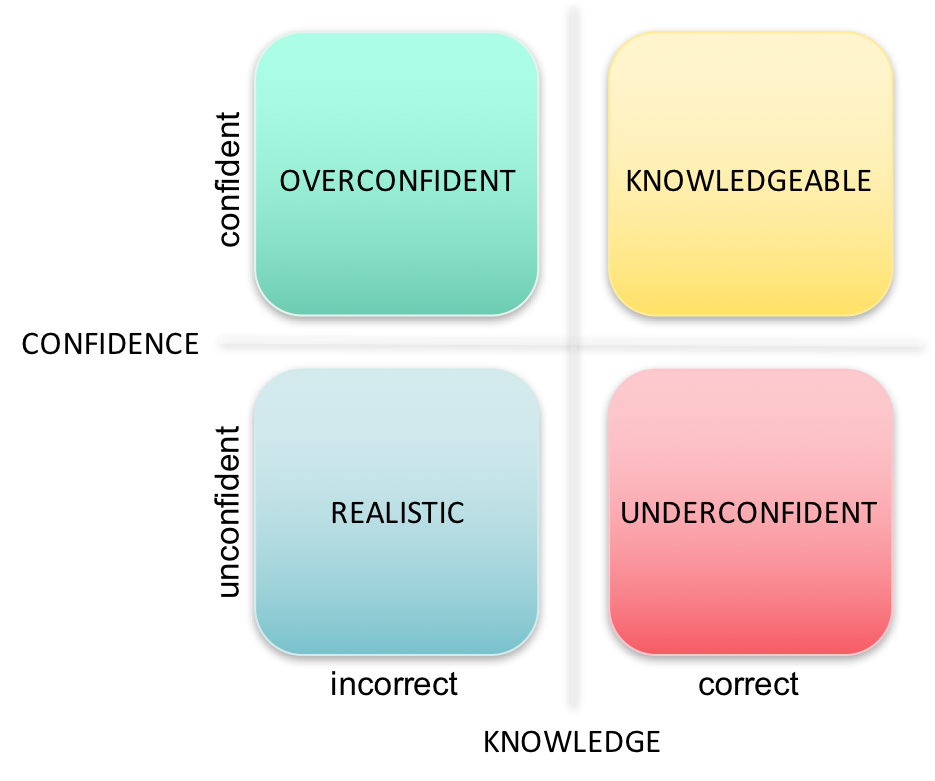

In [8]:
#add another column to the dataframe with conditions for overconfidence and underconfidence
results_df['conf_profile'] = np.where(((results_df.confidence == 0) | (results_df.confidence == 1)) & (results_df.score == 1), 'underconf', 
                                   np.where(((results_df.confidence == 2) | (results_df.confidence == 3)) & (results_df.score == 0), 'overconf', 'other'))
print(results_df)

      user_id  question_id  confidence  score conf_profile
0           0            0           3      1        other
1           0            1           3      1        other
2           0            2           1      1    underconf
3           0            3           3      1        other
4           0            4           3      1        other
5           0            5           2      0     overconf
6           0            6           3      0     overconf
7           0            7           3      0     overconf
8           0            8           3      0     overconf
9           0            9           3      0     overconf
10          0           10           3      1        other
11          0           11           3      1        other
12          0           12           3      1        other
13          0           13           1      1    underconf
14          0           14           3      1        other
15          0           15           3      0     overco

In [9]:
#create a column for the count of underconfidence instances
results_df['uconf'] = np.where(results_df['conf_profile'] == 'underconf', 1, 0)
results_df

,user_id,question_id,confidence,score,conf_profile,uconf
0,0,0,3,1,other,0
1,0,1,3,1,other,0
2,0,2,1,1,underconf,1
3,0,3,3,1,other,0
4,0,4,3,1,other,0
5,0,5,2,0,overconf,0
6,0,6,3,0,overconf,0
7,0,7,3,0,overconf,0
8,0,8,3,0,overconf,0
9,0,9,3,0,overconf,0


## Exercise
Using confidence and score columns, create a boolean column like overconf or uconf and name it 'knowledgeable'. This column will be populated with 1 only when confidnce = 3 and score = 1. Otherwise it will have a value of 0.

In [13]:
#your code goes here

In [10]:
#create a column for the count of overconfidence instances
results_df['overconf'] = np.where(results_df['conf_profile'] == 'overconf', 1, 0)
results_df

,user_id,question_id,confidence,score,conf_profile,uconf,overconf
0,0,0,3,1,other,0,0
1,0,1,3,1,other,0,0
2,0,2,1,1,underconf,1,0
3,0,3,3,1,other,0,0
4,0,4,3,1,other,0,0
5,0,5,2,0,overconf,0,1
6,0,6,3,0,overconf,0,1
7,0,7,3,0,overconf,0,1
8,0,8,3,0,overconf,0,1
9,0,9,3,0,overconf,0,1


## Aggregations

Key functions to know is groupby which groups your data based on the column you select.
Aggregation, which aggregates by the operation you select: sum, count, mean, etc.
Join, joins all your columns back into one dataframe

In [25]:
#aggregate the data from question level to user level
df = results_df.groupby('user_id')
counts = df.size().to_frame(name='ques_count')
agg_results_final = (counts
 .join(df.agg({'confidence': 'mean'}).rename(columns={'confidence': 'avg_conf'}))
 .join(df.agg({'score': 'sum'}).rename(columns={'score': '#correct_answs'}))
 .join(df.agg({'overconf': 'sum'}).rename(columns={'overconf': '#overconf'}))
 .join(df.agg({'uconf': 'sum'}).rename(columns={'uconf': '#underconf'}))
 .reset_index()
)

agg_results_final

,user_id,ques_count,avg_conf,#correct_answs,#overconf,#underconf
0,0,100,2.48,58,37,10
1,1,100,2.56,53,44,4
2,2,100,2.52,64,34,11
3,3,100,2.49,61,35,7
4,4,100,2.61,67,29,7
5,5,100,2.59,65,30,4
6,6,100,2.60,51,45,3
7,7,100,2.65,59,35,1
8,8,100,2.63,53,43,4
9,9,100,2.52,57,39,6


## Distribution of score and confidence

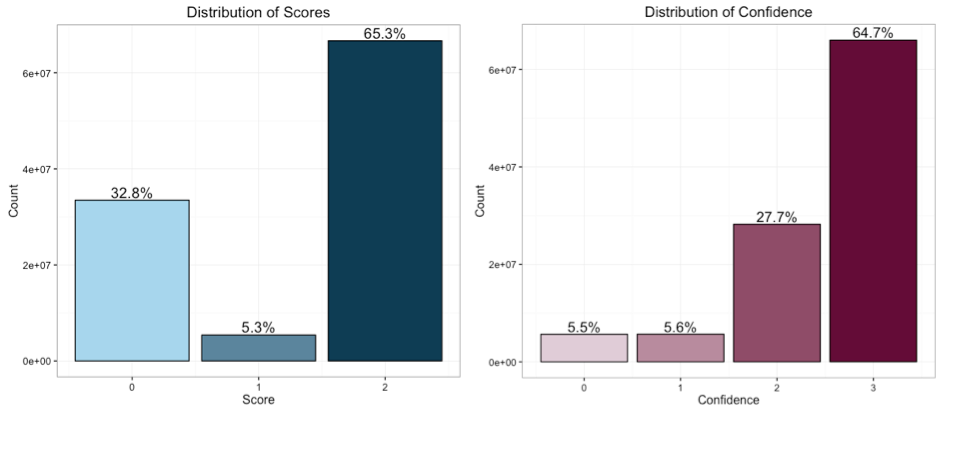

### Plotting: Histograms

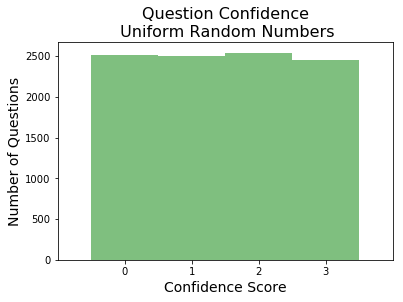

In [12]:
#plot distribution of confidence from uniform distribution (see slide 7)
f,ax = plt.subplots()
bins = [-0.5, 0.5,1.5,2.5,3.5,4.5]
plt.hist(results_i_df['confidence'], bins = bins, facecolor='green', alpha=0.5)
plt.xticks(range(0,4))
plt.xlim([-1,4])
plt.xlabel('Confidence Score', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Question Confidence\n Uniform Random Numbers', fontsize=16)
plt.show()
%matplotlib inline  

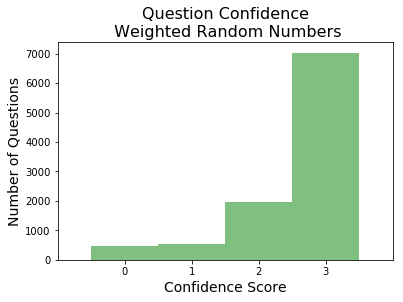

In [13]:
#plot distribution of confidence from probability distribution (see slide 7)
f,ax = plt.subplots()
bins = [-0.5, 0.5,1.5,2.5,3.5,4.5]
plt.hist(results_df['confidence'], bins = bins, facecolor='green', alpha=0.5)
plt.xticks(range(0,4))
plt.xlim([-1,4])
plt.xlabel('Confidence Score', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Question Confidence\n Weighted Random Numbers', fontsize=16)
display()

## Exercise: 
Plot distribution of scores both for random data and for probability distribution

In [26]:
#your code goes here

## Correlation of Variables(slide 14)
Correlations show the relationship (negative or positive, strong or weak) between the variables you choose. For example, how correlated is student's midterm grade with their final grade.

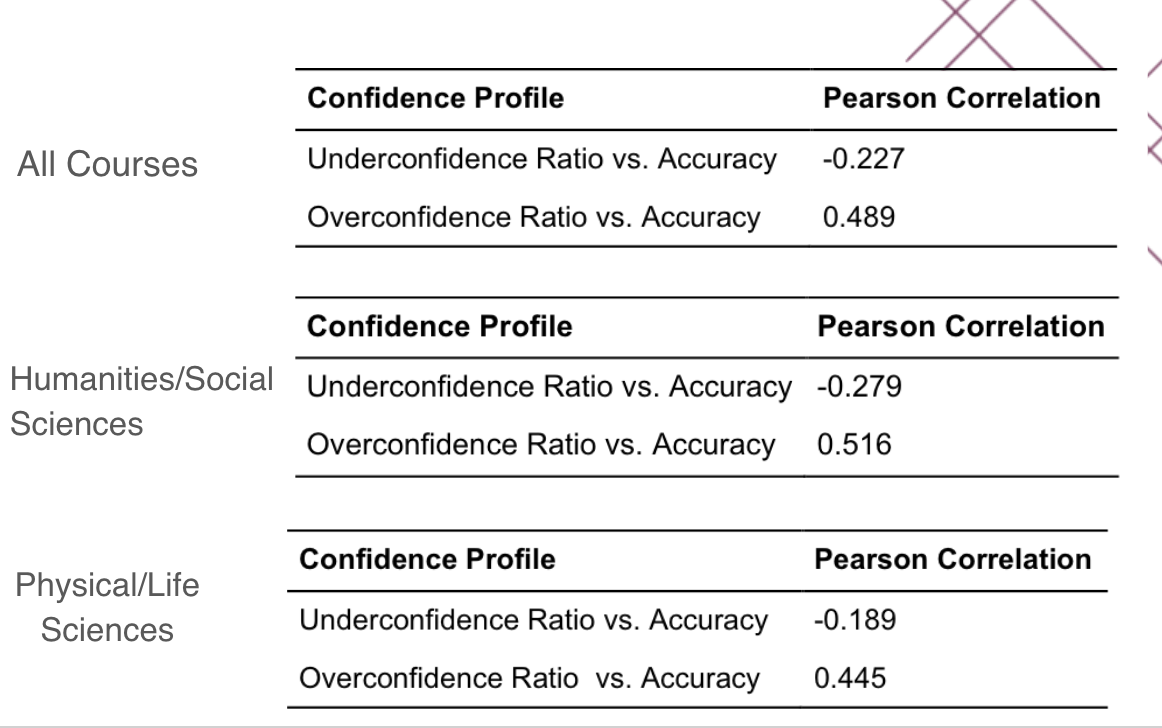

In [17]:
#calculate correlation between average confidence and accuracy
agg_results_final['avg_conf'].corr(agg_results_final['#correct_answs'])

-0.0020674452296797433

In [18]:
#your code goes here
data = agg_results_final[['avg_conf','#correct_answs']]
correlation = data.corr(method='pearson')
correlation

,avg_conf,#correct_answs
avg_conf,1.000000,-0.002067
#correct_answs,-0.002067,1.000000


## Exercise: 
Calculate Pearson correlation between two other values that you find meaningful.

In [32]:
#your code goes here

## Time series

* Group question level df by question index
* Find counts of confidence profiles for the question level group
* Find total number of questions for question level group
* Find % of questions in each conf profile for question level group
* Plot x -> question index vs y -> (%uc, %oc, %k, %r)

## Confidence profiles from uniformly generated random data

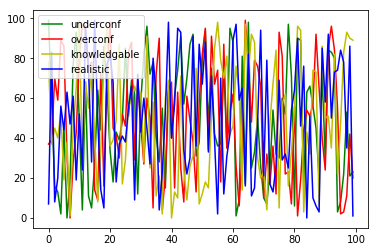

In [19]:
question_index = range(0,100)
per_u_c = random.sample(xrange(100), 100)
per_o_c = random.sample(xrange(100), 100)
per_k = random.sample(xrange(100), 100)
per_r = random.sample(xrange(100), 100)


f,ax = plt.subplots()
ax.plot(question_index, per_u_c, 'g-', label='underconf')
ax.plot(question_index, per_o_c, 'r-', label='overconf')
ax.plot(question_index, per_k, 'y-', label='knowledgable')
ax.plot(question_index, per_r, 'b-', label='realistic')
ax.legend(loc='best')
display()

## Confidence profiles from weighted random generation of data

In [20]:
prc_df = results_df.groupby('question_id').agg({'overconf':'sum', 'uconf':'sum'}).reset_index()

# f = {'overconf':['sum'], 'uconf': lambda g: results_df.ix[g.index].uconf.sum() * 100/ 100}
# percent_df = results_df.groupby('question_id').agg(f).reset_index()

# prc_df['perc_u'] = time_df['overconf']
# prc_df['perc_o'] = time_df['uconf']

In [21]:
prc_df

,question_id,overconf,uconf
0,0,33,3
1,1,36,6
2,2,37,7
3,3,33,9
4,4,39,5
5,5,40,11
6,6,32,6
7,7,37,4
8,8,45,5
9,9,33,9


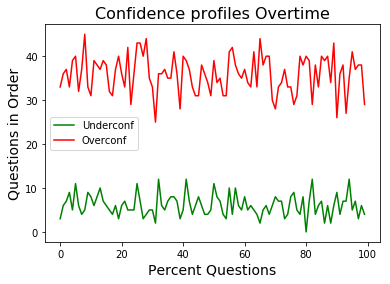

In [22]:
question_index = range(0,100)
per_uc = prc_df['uconf']
per_oc = prc_df['overconf']
#per_k = random.sample(xrange(100), 100)
#per_r = random.sample(xrange(100), 100)

f,ax = plt.subplots()
ax.plot(question_index, per_uc, 'g-', label='Underconf')
ax.plot(question_index, per_oc, 'r-', label='Overconf')
# ax.plot(question_index, per_k, 'y-', label='knowledgable')
# ax.plot(question_index, per_r, 'b-', label='realistic')
ax.legend(loc='best')
plt.xlabel('Percent Questions', fontsize=14)
plt.ylabel('Questions in Order', fontsize=14)
plt.title('Confidence profiles Overtime', fontsize=16)
display()